<a href="https://colab.research.google.com/github/rahuldiamond/Blood-Donation-Analysis-/blob/main/Blood_Donation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

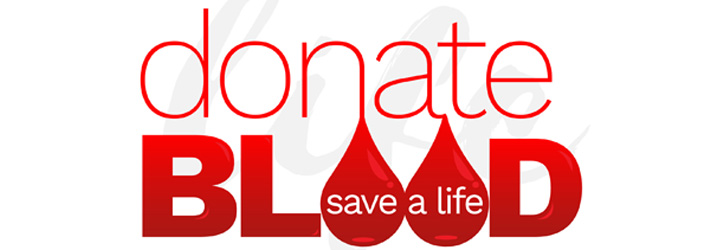

**#importing library for reading, writing and perform basic operations**

In [1]:
import numpy as np
import pandas as pd


**#Importing library for visualization**

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#**Importing library for splitting model into train and test and for data transformation**


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score


**#Filter the unwanted warning**

In [4]:
import warnings
warnings.simplefilter("ignore")


**#Importing all the required model for model comparision**



In [5]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC


**### Reading the Data**

In [6]:
train = pd.read_csv("blood-train.csv")
test = pd.read_csv("blood-test.csv")

**#Printing the train and test size**

In [7]:
print("Train Shape : ",train.shape)
print("Test Shape : ", test.shape)


Train Shape :  (576, 6)
Test Shape :  (200, 5)


**#Printing first five rows of data**

In [8]:
train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


**#Counting the number of people who donated and not donated**

In [9]:
train["Made Donation in March 2007"].value_counts() 

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

**#Storing dependent variable in Y**

In [10]:
Y = train.iloc[:,-1]
Y.head()


0    1
1    1
2    1
3    1
4    0
Name: Made Donation in March 2007, dtype: int64

In [11]:
train.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


**#Removing Unnamed: 0 columns**

In [12]:
old_train = train
train = train.iloc[:, 1:5]
test = test.iloc[:, 1:5]

**#Printing first  rows**

In [13]:
train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


**#Merging both train and test data**

In [14]:
df = pd.merge(train,test)

In [15]:
df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


In [16]:
df.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,810.000000,810.000000,810.000000,810.000000
mean,7.035802,1.177778,294.444444,7.927160
std,6.198405,0.629321,157.330166,7.752882
min,2.000000,1.000000,250.000000,2.000000
25%,2.500000,1.000000,250.000000,4.000000
50%,4.000000,1.000000,250.000000,4.000000
75%,11.000000,1.000000,250.000000,11.000000
max,23.000000,7.000000,1750.000000,76.000000


**#Setting the independent variable and dependent variable**

In [17]:
X = df.iloc[:,:]
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


**### Data Exploration**
*# Statistics of the data*

In [18]:
train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


*#Boxplot for Different variables*

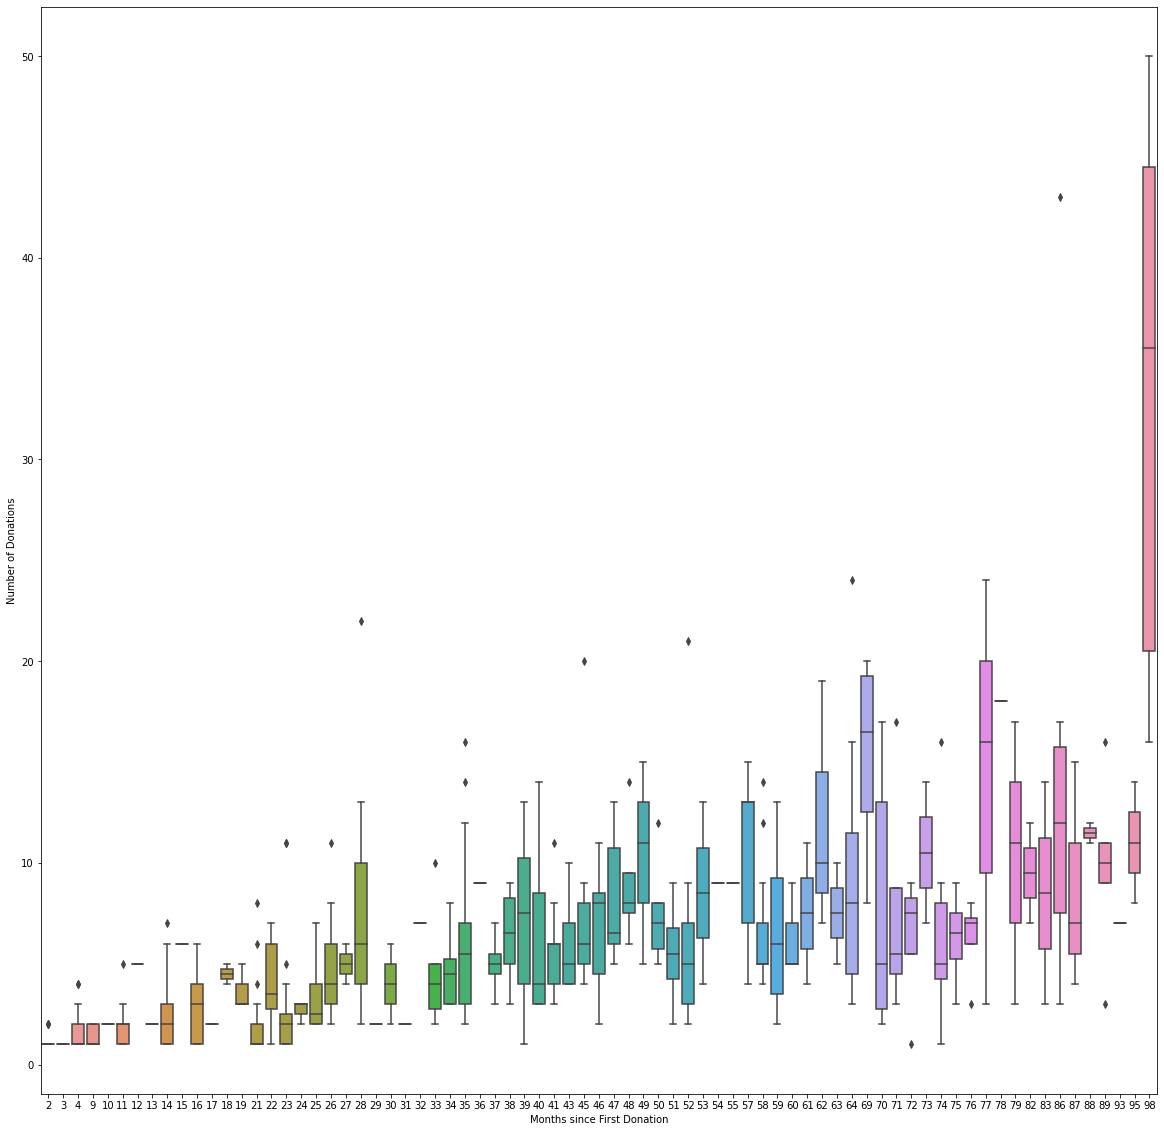

In [19]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(x="Months since First Donation", y="Number of Donations", data=old_train)



***#Boxplot for Months since Last Donation**

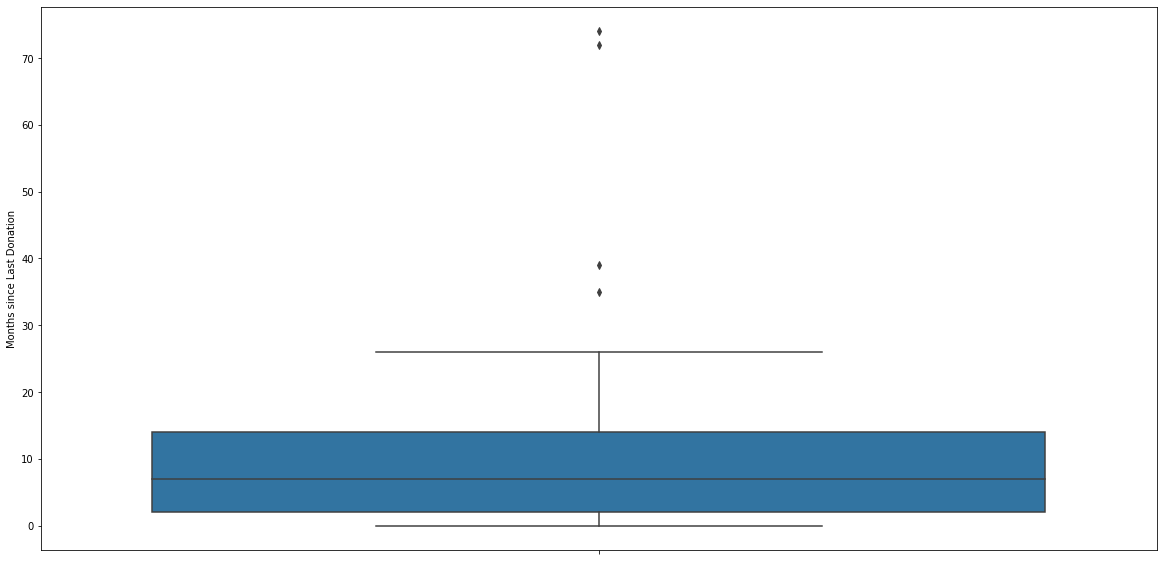

In [20]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(y="Months since Last Donation", data=old_train)




**We see from the above boxplot that the maximum people have donated blood in nearby 10 months.**

**#Correlation between all variables [Checking how different variable are related]**

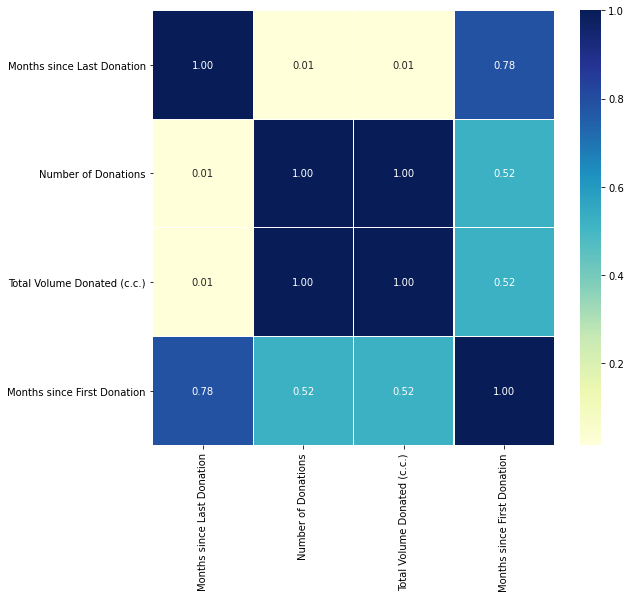

In [21]:
corrmat = X.corr()
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(corrmat, ax = ax, cmap= "YlGnBu", linewidths= 0.1,fmt= ".2f",annot=True)

**#Printing all unique value for Month Since Last donation**

In [22]:
train["Months since Last Donation"].unique()


array([ 2,  0,  1,  4,  5,  3, 12,  6, 11,  9, 10, 13, 14,  8,  7, 16, 23,
       21, 18, 22, 26, 35, 74, 15, 20, 17, 25, 39, 72])

**Feature Engineering**



Volume donated is also a good feature to know wether the donor will donate or not.


**#Creating new variable for calculating how many times a person have donated**

In [23]:
X["Donating for"] = (X["Months since First Donation"] - X["Months since Last Donation"])


**#Seeing first five rows of the DataFrame**

In [24]:
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Donating for
0,2,2,500,4,2
1,2,2,500,4,2
2,2,2,500,4,2
3,2,2,500,4,2
4,2,2,500,4,2


**#Correlation between all variables**

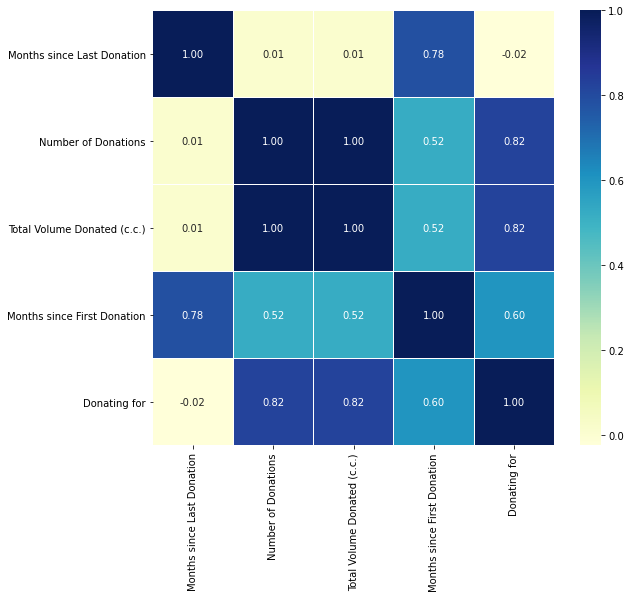

In [25]:
corrmat=X.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True) 


**Since Total Volume Donated (c.c.) have the very high correlation with other variables so we are dropping the variable.**

**#Dropping the unnecessary column**

In [26]:
X.drop([ 'Total Volume Donated (c.c.)'], axis=1, inplace=True)


In [27]:
X.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Donating for
0,2,2,4,2
1,2,2,4,2
2,2,2,4,2
3,2,2,4,2
4,2,2,4,2


**#Shape of independent variable**

In [28]:
X.shape

(810, 4)

**### Feature Transformation**

**#Feature Scaling**

In [29]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()


**#Fitting and transforming data**

In [30]:
X=scale.fit_transform(X)

In [31]:
train=X[:576]

In [32]:
train.shape

(576, 4)

In [33]:
test=X[576:]
test=X[576:]

In [34]:
Y.shape

(576,)

**### Model Building**

**#Splitting into train and test set**

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(train,Y,test_size=0.2,random_state=0)


### <center><u>StepsTo Follow
</u>
    <br><br>
<ul style="margin-left:40%">
    <li>Create the object</li>
    <li>Do the necessary hyperparameter tuning</li>
    <li>Fit the model</li>
    <li>Predict the test set</li>
    <li>Compute roc_auc_score</li>
    <li>Repeat above step for all model</li>
    <li>Compare roc_auc_Score of all model and choose the best model</li>
</ul>
</center>
<br><br>


*## Logistic regression*

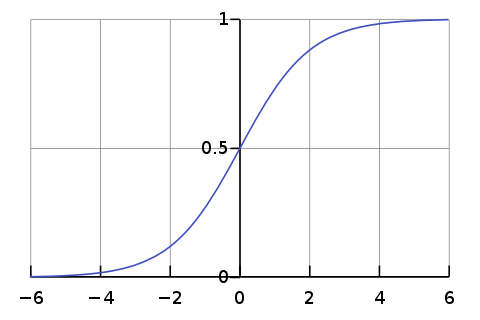

*#Building the model*

In [36]:
logreg = LogisticRegression(random_state=7)

*#Fitting the model*

In [37]:
logreg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

*#Predicting on the test data*

In [38]:
pred = logreg.predict(xtest)

*checking accuracy_score*


In [39]:
accuracy_score(pred,ytest)

0.7155172413793104

*#Printing the roc_auc_score*

In [40]:
roc_auc_score(pred,ytest)

0.7321428571428571

**## Support Vector Machine**

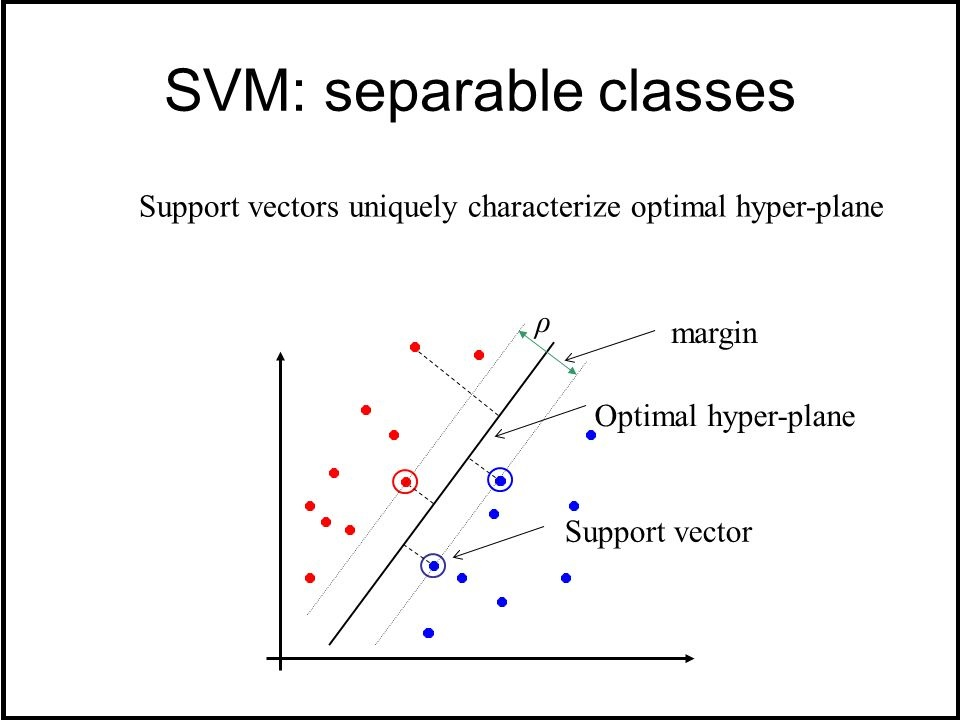

**### SVC classifier**

In [41]:
SVMC = SVC(probability=True)

*#Fitting the model*

In [42]:
SVMC.fit(train,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

*#Predicting on the test data*

In [43]:
pred = SVMC.predict(xtest)

In [44]:
accuracy_score(pred, ytest)

0.7844827586206896

*#Printing the confusion matrix*

In [45]:
confusion_matrix(pred,ytest)

array([[80, 24],
       [ 1, 11]])

*#Printing the roc auc score*

In [46]:
roc_auc_score(pred,ytest)

0.8429487179487177

**## Random Forest**

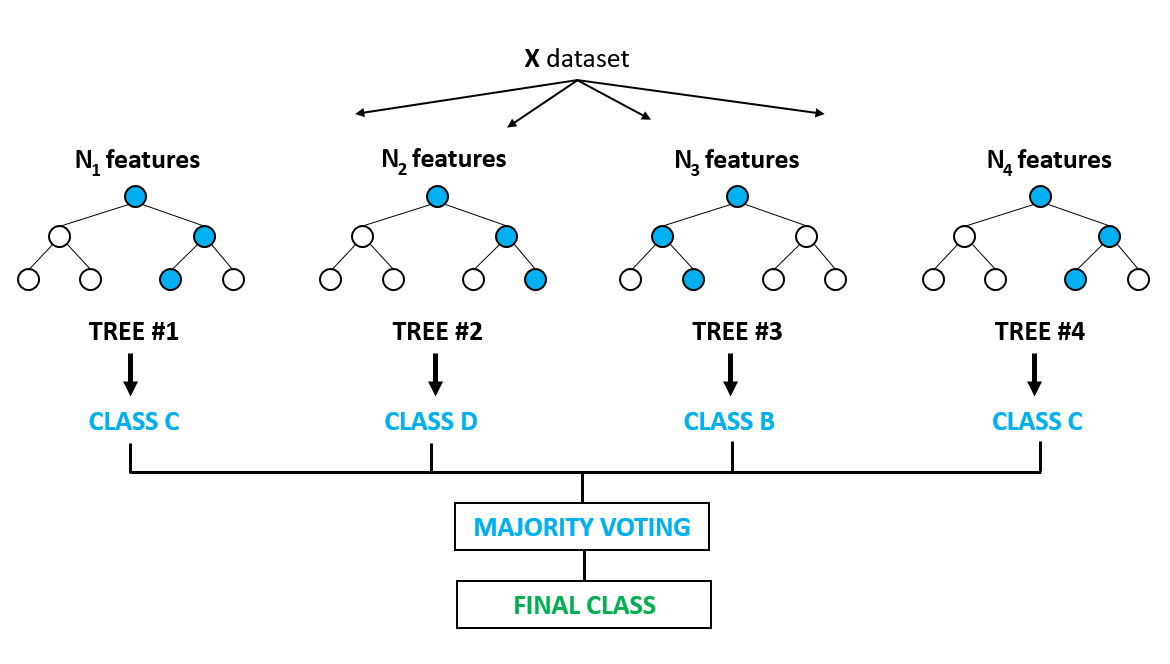

*#Buildin the model*

In [47]:
RFC = RandomForestClassifier()

*#Fitting the model*

In [48]:
RFC.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

*#Predicting the test data result*

In [49]:
confusion_matrix(pred,ytest)

array([[80, 24],
       [ 1, 11]])

In [50]:
accuracy_score(pred, ytest)

0.7844827586206896

*accuracy_score(pred, ytest)*

In [51]:
roc_auc_score(pred,ytest)

0.8429487179487177

**## Decision Tree**

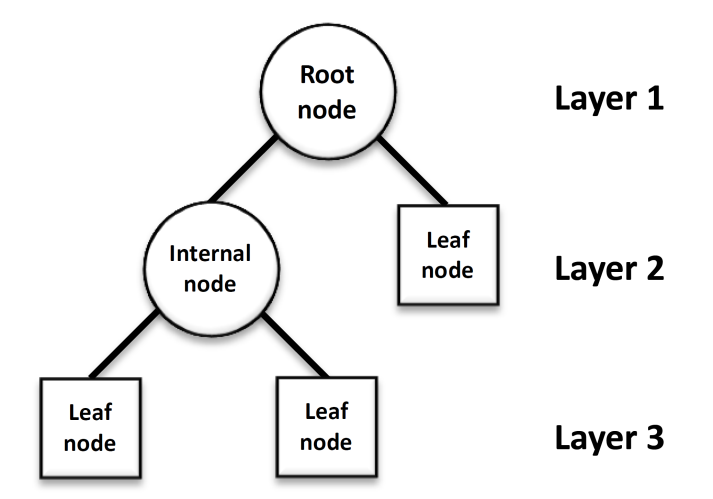

*#Building the model*

In [52]:
model = DecisionTreeClassifier(max_leaf_nodes=4,max_features=3,max_depth=15)


*#Fitting the model*

In [53]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=3, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

*#Predicting the test data*

In [54]:
accuracy_score(pred, ytest)

0.7844827586206896

*#printing the confusion matrix*

In [55]:
confusion_matrix(pred,ytest)

array([[80, 24],
       [ 1, 11]])

*#Printing accuracy score*

In [56]:
accuracy_score(pred,ytest)

0.7844827586206896

*#Printing roc auc score*

In [57]:
roc_auc_score(pred,ytest)

0.8429487179487177

**## MLP Classifier**

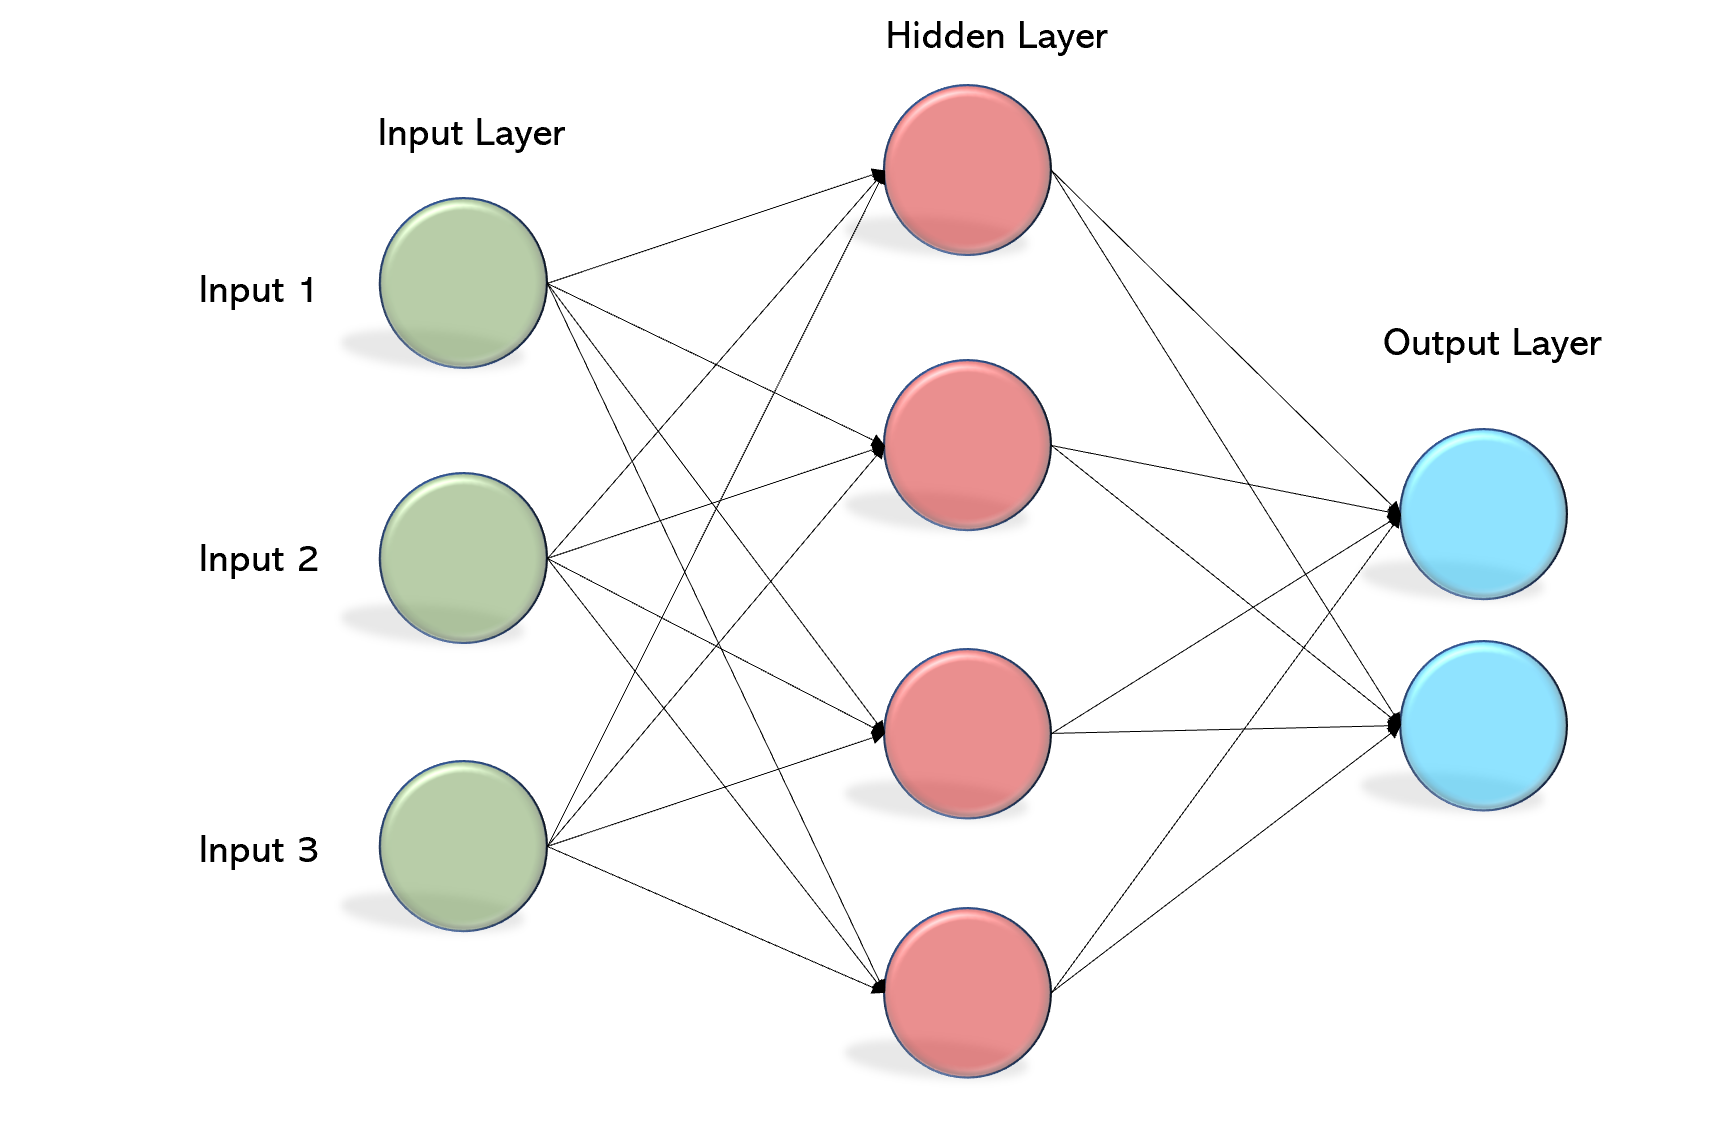

*#Building the Model*

In [58]:
clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25,),random_state=1)

In [59]:
clf_neural.fit(train, Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(25,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

*#Predicting from the fitted model on test data*

In [60]:
print('Predicting...\nIn Test Data')

Predicting...
In Test Data


In [61]:
predicted = clf_neural.predict(xtest)

*#printing confusion matrix*

In [62]:
confusion_matrix(predicted,ytest)

array([[80, 24],
       [ 1, 11]])

*#Printing roc auc score*

In [63]:
roc_auc_score(pred,ytest)

0.8429487179487177

In [64]:
accuracy_score(pred, ytest)

0.7844827586206896